# 데이터의 기본 정보 요약

## 필수 라이브러리 로딩

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# 한글 처리
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

## 데이터셋 로딩

In [5]:
file = 'C:/k-digital/data analysis/data/chipotle.tsv'
chipo = pd.read_csv(file, sep='\t')

## 요약정보 확인

In [ ]:
chipo.shape

In [6]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [7]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [8]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

- order_id: 주문번호
- quantity: 수량
- item_name: 메뉴 이름
- choice_description: 토핑 
- item_price: 가격

In [ ]:
chipo.index

In [ ]:
# 수치형 자료들의 기초 통계량
chipo.describe()

In [9]:
# order_id는 숫자의 의미를 가지고 있다고 볼 수 없다.
chipo['order_id'] = chipo['order_id'].astype(str)

In [10]:
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [16]:
# unique()
len(chipo['item_name'].unique())  # 메뉴 50 개 

50

In [17]:
len(chipo['order_id'].unique())  # 주문 건수

1834

# 인사이트의 발견: 탐색적 데이터 분석

## 가장 많이 주문한 메뉴

In [13]:
# value_counts(): 개별 건수를 계산하는 메서드
## 내림차순 정렬되서 반환된다.
item_count = chipo['item_name'].value_counts()[:10]
item_count

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [14]:
# top 10
# items()
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_15212\353898459.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):


In [15]:
chipo['item_name'].value_counts().index.tolist()[0]

'Chicken Bowl'

## 메뉴 당 주문 총수량

In [18]:
order_sum = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending = False)

In [ ]:
chipo.groupby('item_name')['order_id'].count().sort_values(ascending = False)

In [11]:
chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))

In [12]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


**메뉴별 주문 총량의 시각화**

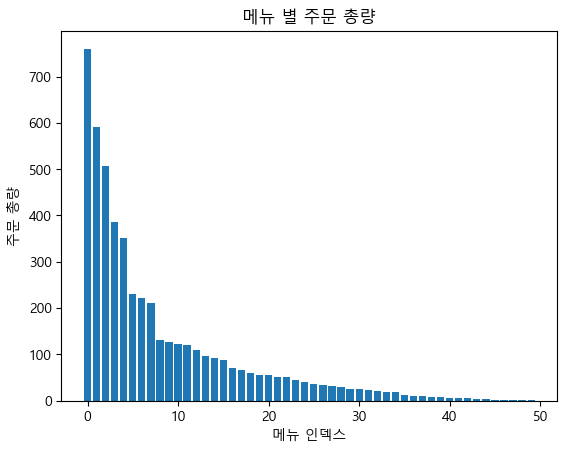

In [19]:
item_name_list = order_sum.index.tolist()
x = np.arange(len(item_name_list))
y = order_sum.values.tolist()

plt.title('메뉴 별 주문 총량')
plt.bar(x, y)
plt.xlabel('메뉴 인덱스')
plt.ylabel('주문 총량')

plt.show()

## 메뉴별 가격

In [21]:
# 주문 수량이 1개인 제품을 대상으로 계산
one_item = chipo[chipo.quantity == 1]
# one_item 중 아이템 별 가격
price_item = one_item.groupby('item_name').min()  # 숫자 데이터는 price밖에 없기 때문에 min()에 변수 지정 안 해줘도 됨
price_item.sort_values('item_price',ascending=False)

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


**가격 분포 시각화**

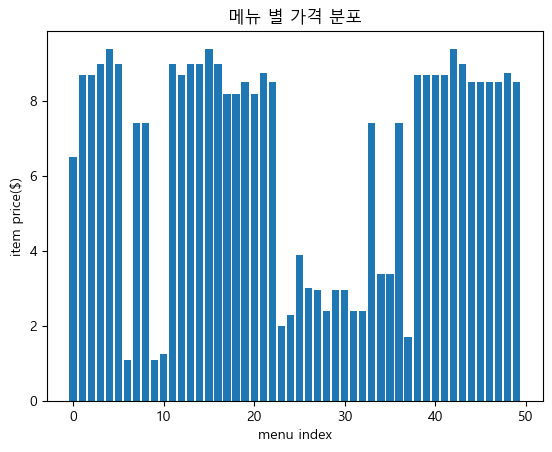

In [22]:
item_name_list  = price_item.index.tolist()
x = np.arange(len(item_name_list))
item_price = price_item['item_price'].tolist()

plt.title('메뉴 별 가격 분포')
plt.bar(x, item_price)
plt.ylabel('item price($)')
plt.xlabel('menu index')

plt.show()

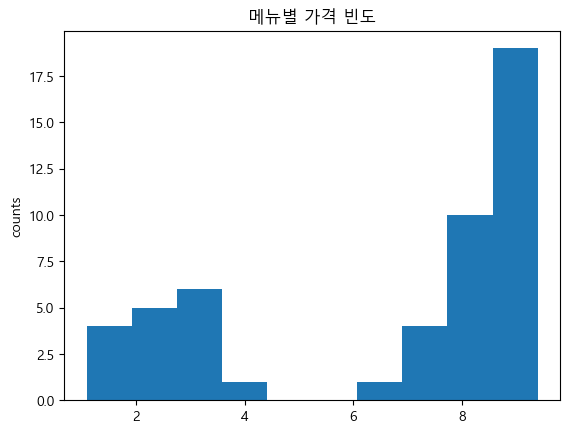

In [23]:
# 메뉴별 가격의 히스토그램
plt.hist(item_price)
plt.ylabel('counts')
plt.title('메뉴별 가격 빈도')
plt.show()

**가장 비싼 메뉴가 총 몇 개 팔렸는지**

In [32]:
price_item['item'

KeyError: "None of [Int64Index([0, 0], dtype='int64')] are in the [columns]"

## 테이블 당 평균 결제 금액